```

[TITLE]
By Svitlana Midianko
Spring 2021
github: https://github.com/svitlanamidianko/ML-and-predicting-product-success

``` 



- scaling all data
- getting dummies
- cross validation
- rating prediction:
  - random forest to predict the rating  [here](https://www.kaggle.com/mdp1990/predicting-google-play-app-store-ratings)
  - linear regression
  - SVM linear regression
- success prediction: 
  - ranndom forest to predict success (with 1,0 encoded as success and no post-launch metrics in)
  - logistic regression
  - SVM classifier
- neural net to predict success?

# Table of contents

>1. [Data Loading and Pre-processing](#first)
>2. [Initial explorary data analysis](#second)
>3. **Modeling**
>> Model 1 




# 1. Data Loading and Pre-processing 
<a class = 'anchor' id="first"></a>

In [ ]:
# importing necessary modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import files
from google.colab import drive
import sklearn.linear_model


In [ ]:
drive.mount('/content/drive' , force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4mxVIvQC2_cXdtRierUd6r1oHhsaMVMUUIe9X42hbLxKf3E8L2RGg


In [ ]:
path_reviews = '/content/drive/My Drive/academic minerva/JUNIOR/_CS156_ml/Assignments/ML final project/Data/googleplaystore_user_reviews.csv'
path_ratings = '/content/drive/My Drive/academic minerva/JUNIOR/_CS156_ml/Assignments/ML final project/Data/googleplaystore.csv'
reviews_raw = pd.read_csv(path_reviews, error_bad_lines=False)
ratings_raw = pd.read_csv(path_ratings, error_bad_lines=False)

In [ ]:
reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
reviews_raw.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
print(max(reviews_raw['Sentiment_Polarity']), min(reviews_raw['Sentiment_Polarity']))
print(max(reviews_raw['Sentiment_Subjectivity']), min(reviews_raw['Sentiment_Subjectivity']))


1.0 -1.0
1.0 0.0


In [ ]:
ratings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
ratings_raw.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


- Convert all app sizes to MB
- Remove '+' from 'Number of Installs' to make it numeric
- Convert all review text to English language using Google Translator library

## Cleaning

In [ ]:
ratings_raw.drop(ratings_raw.loc[ratings_raw['Category']=='1.9'].index, inplace=True)

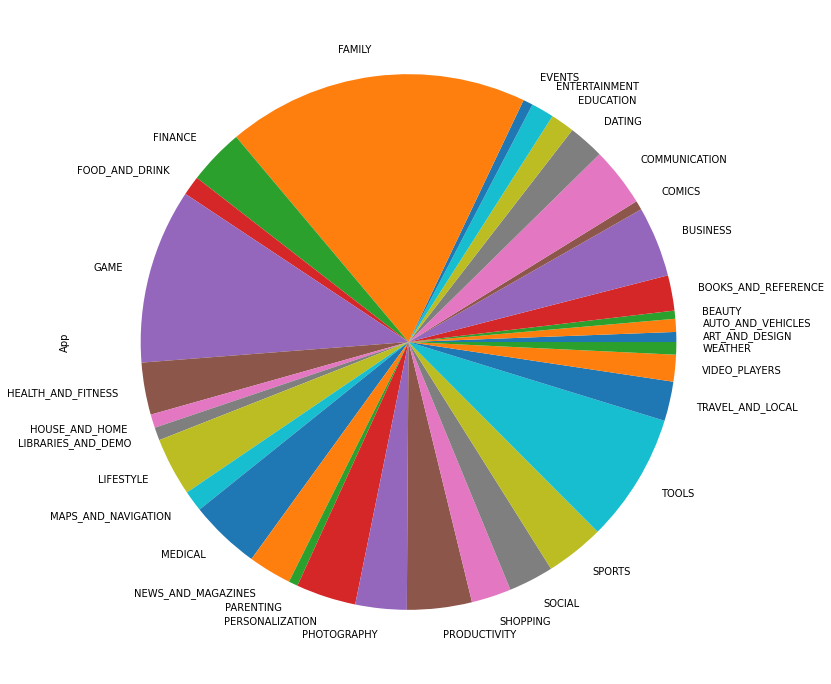

In [ ]:
ratings_raw.groupby('Category').count().plot.pie(y = 'App', figsize = (12,20), legend = False)

Family, games, and tools are most popular. What are those 'tools' apps?

In [ ]:
ratings_raw[ratings_raw['Category'] == 'TOOLS'].head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3233,Moto File Manager,TOOLS,4.1,38655,5.9M,"10,000,000+",Free,0,Everyone,Tools,"February 1, 2018",v3.7.93,5.0 and up
3234,Google,TOOLS,4.4,8033493,Varies with device,"1,000,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
3235,Google Translate,TOOLS,4.4,5745093,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device
3236,Moto Display,TOOLS,4.2,18239,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"August 6, 2018",Varies with device,Varies with device
3237,Motorola Alert,TOOLS,4.2,24199,3.9M,"50,000,000+",Free,0,Everyone,Tools,"November 21, 2014",1.02.53,4.4 and up
3238,Motorola Assist,TOOLS,4.1,37333,Varies with device,"50,000,000+",Free,0,Everyone,Tools,"January 17, 2016",Varies with device,Varies with device
3239,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759663,15M,"100,000,000+",Free,0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up
3240,Moto Suggestions ™,TOOLS,4.6,308,4.3M,"1,000,000+",Free,0,Everyone,Tools,"June 8, 2018",0.2.32,8.0 and up
3241,Moto Voice,TOOLS,4.1,33216,Varies with device,"10,000,000+",Free,0,Everyone,Tools,"June 5, 2018",Varies with device,Varies with device
3242,Calculator,TOOLS,4.3,40770,Varies with device,"100,000,000+",Free,0,Everyone,Tools,"November 21, 2017",Varies with device,Varies with device


In [ ]:
ratings_raw["Rating"] = pd.to_numeric(ratings_raw["Rating"])
ratings_raw["Rating"].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
ratings_raw["Reviews"] = pd.to_numeric(ratings_raw["Reviews"])
ratings_raw["Reviews"].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [ ]:
'%f' % ratings_raw["Reviews"].describe()['mean']

'444152.896033'

In [ ]:
ratings_raw.groupby('Size').count()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
Size,,,,,,,,,,,,
1.0M,7,7,4,7,7,7,7,7,7,7,7,7
1.1M,32,32,25,32,32,32,32,32,32,32,32,32
1.2M,41,41,30,41,41,41,41,41,41,41,41,41
1.3M,35,35,27,35,35,35,35,35,35,35,35,35
1.4M,37,37,25,37,37,37,37,37,37,37,37,37
...,...,...,...,...,...,...,...,...,...,...,...,...
98M,16,16,14,16,16,16,16,16,16,16,16,16
992k,1,1,0,1,1,1,1,1,1,1,1,1
994k,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
ratings_raw['Size']=ratings_raw['Size'].replace('Varies with device',np.nan)

In [ ]:
mask = ratings_raw[ratings_raw['Size'].str.contains('k',  na=False)]
mask['Size']  = mask['Size'].str.replace('k','')
mask["Size"] = pd.to_numeric(mask["Size"])
mask['SizeMB']  = mask['Size']/1024
mask.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,201.0,"100,000+",Free,0,Everyone,Auto & Vehicles,"August 26, 2014",1.0.1,2.2 and up,0.196289
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,23.0,"100,000+",Free,0,Everyone,Business,"September 11, 2015",3.0.1.11 (Build 311),2.2 and up,0.022461
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,79.0,"10,000,000+",Free,0,Everyone,Communication,"September 2, 2015",0.1.100944346,4.0.3 and up,0.077148
450,Caller ID +,COMMUNICATION,4.0,9498,118.0,"1,000,000+",Free,0,Everyone,Communication,"June 7, 2016",5.28.0,2.3 and up,0.115234
458,GO Notifier,COMMUNICATION,4.2,124346,695.0,"10,000,000+",Free,0,Everyone,Communication,"July 6, 2014",2.8,2.0 and up,0.678711


In [ ]:
mask2 = ratings_raw[ratings_raw['Size'].str.contains('M',  na=False)]
mask2['Size']  = mask2['Size'].str.replace('M','')
mask2["Size"] = pd.to_numeric(mask2["Size"])
mask2['SizeMB']  = mask2["Size"] 
mask2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [ ]:
mask3 = ratings_raw[ratings_raw['Size'].isna()]
mask3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,NaN,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,NaN,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,NaN,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,NaN,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,NaN,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,NaN,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,NaN,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,NaN,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [ ]:
ratings = pd.concat([mask, mask2, mask3])
ratings.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,NaN,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device,NaN
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,NaN,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up,NaN
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,NaN,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device,NaN
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device,NaN
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN


In [ ]:
ratings["Installs"] =ratings["Installs"].str.replace('+', "")
ratings["Installs"] =ratings["Installs"].str.replace(',', "")
ratings["Installs"] =pd.to_numeric(ratings["Installs"])

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 58 to 10839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  SizeMB          9145 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 1.2+ MB


In [ ]:
ratings.groupby(['Type']).count()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB
Type,,,,,,,,,,,,,
Free,10039,10039,8719,10039,8421,10039,10039,10039,10039,10039,10033,10038,8421
Paid,800,800,647,800,724,800,800,800,800,800,798,799,724


In [ ]:
ratings["Price"] =ratings["Price"].str.replace('$', "")
ratings["Price"] =pd.to_numeric(ratings["Price"])


In [ ]:
ratings["Price"].describe()

count    10840.000000
mean         1.027368
std         15.949703
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

In [ ]:
ratings[ratings['Price'] == 400.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,SizeMB
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,7.3


In [ ]:
ratings.groupby('Content Rating').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,SizeMB
Content Rating,,,,,,,,,,,,,
Adults only 18+,3,3,3,3,2,3,3,3,3,3,3,3,2
Everyone,8714,8714,7420,8714,7416,8714,8714,8714,8714,8714,8706,8712,7416
Everyone 10+,414,414,397,414,332,414,413,414,414,414,414,414,332
Mature 17+,499,499,461,499,406,499,499,499,499,499,499,499,406
Teen,1208,1208,1084,1208,987,1208,1208,1208,1208,1208,1208,1208,987
Unrated,2,2,1,2,2,2,2,2,2,2,2,2,2


In [ ]:
ratings_raw.drop(ratings_raw.loc[ratings_raw['Content Rating']=='Adults only 18+'].index, inplace=True)
ratings_raw.drop(ratings_raw.loc[ratings_raw['Content Rating']=='Unrated'].index, inplace=True)

In [ ]:
ratings.groupby('Genres').count()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,SizeMB
Genres,,,,,,,,,,,,,
Action,365,365,358,365,327,365,365,365,365,365,365,365,327
Action;Action & Adventure,17,17,17,17,16,17,17,17,17,17,17,17,16
Adventure,75,75,73,75,69,75,75,75,75,75,75,75,69
Adventure;Action & Adventure,13,13,13,13,13,13,13,13,13,13,13,13,13
Adventure;Brain Games,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Video Players & Editors,173,173,158,173,130,173,173,173,173,173,173,173,130
Video Players & Editors;Creativity,2,2,2,2,2,2,2,2,2,2,2,2,2
Video Players & Editors;Music & Video,3,3,3,3,1,3,3,3,3,3,3,3,1


In [ ]:
ratings = ratings.drop(labels = ['Last Updated', 'Android Ver', 'Size'], axis = 1)
ratings.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Current Ver,SizeMB
58,Restart Navigator,AUTO_AND_VEHICLES,4.0,1403,100000,Free,0.0,Everyone,Auto & Vehicles,1.0.1,0.196289
209,Plugin:AOT v5.0,BUSINESS,3.1,4034,100000,Free,0.0,Everyone,Business,3.0.1.11 (Build 311),0.022461
384,Hangouts Dialer - Call Phones,COMMUNICATION,4.0,122498,10000000,Free,0.0,Everyone,Communication,0.1.100944346,0.077148
450,Caller ID +,COMMUNICATION,4.0,9498,1000000,Free,0.0,Everyone,Communication,5.28.0,0.115234
458,GO Notifier,COMMUNICATION,4.2,124346,10000000,Free,0.0,Everyone,Communication,2.8,0.678711


# 2. Initial Exploratory Data Analysis <a class="anchor" id="second"></a>